In [214]:
import pandas as pd
import numpy as np

from surprise import Reader, Dataset, SVD, KNNBasic
from surprise.model_selection import cross_validate, GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

Import data

In [215]:
ratings = Dataset.load_builtin('ml-100k')

Compute the average MAE and RMSE of the Probabilistic Matrix Factorization 

In [216]:
PMF = cross_validate(algo=SVD(), data=ratings, measures=["MAE", "RMSE"], cv=5, verbose=True)

Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7395  0.7356  0.7386  0.7340  0.7462  0.7388  0.0042  
RMSE (testset)    0.9403  0.9334  0.9346  0.9299  0.9460  0.9368  0.0057  
Fit time          0.71    0.67    0.69    0.63    0.63    0.67    0.03    
Test time         0.09    0.08    0.08    0.08    0.08    0.09    0.00    


User based Collaborative Filtering

In [217]:
UserBasedFilter = KNNBasic(sim_options={'user_based': True})
userBasedScores = cross_validate(algo=UserBasedFilter, data=ratings, measures=["RMSE", "MAE"], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9776  0.9801  0.9774  0.9784  0.9777  0.9783  0.0010  
MAE (testset)     0.7720  0.7769  0.7694  0.7729  0.7714  0.7725  0.0025  
Fit time          0.18    0.15    0.15    0.17    0.17    0.16    0.01    
Test time         2.12    2.05    2.23    2.12    2.13    2.13    0.06    


Item based Collaborative Filtering

In [218]:
itemBasedFilter = KNNBasic(sim_options={'user_based': False})
itemBasedScores = cross_validate(algo=itemBasedFilter, data=ratings, measures=["RMSE", "MAE"], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9727  0.9808  0.9717  0.9696  0.9791  0.9748  0.0044  
MAE (testset)     0.7680  0.7755  0.7694  0.7663  0.7708  0.7700  0.0031  
Fit time          0.25    0.28    0.27    0.25    0.26    0.26    0.01    
Test time         2.57    2.43    2.43    2.55    2.47    2.49    0.06    


Examine how the cosine, MSD (Mean Squared Difference), and Pearson similarities impact the performances of User based Collaborative Filtering and Item based Collaborative Filtering.

In [219]:
parameters = {
    'sim_options': {
        'name': ['msd', 'cosine', 'pearson'],
        'user_based': [True, False],
    },
}
grid = GridSearchCV(algo_class=KNNBasic, param_grid=parameters, measures=["rmse", "mae"], cv=5)
grid.fit(ratings)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...


In [220]:
rmse_score = grid.cv_results['mean_test_rmse']
mae_score = grid.cv_results['mean_test_mae']
name = [dict['name'] for dict in grid.cv_results['param_sim_options']]
user_based = [dict['user_based'] for dict in grid.cv_results['param_sim_options']]
df = pd.DataFrame(np.transpose([rmse_score, mae_score, name, user_based]), columns=['rmse', 'mae', 'name', 'user_based'])
df = df.astype({'rmse': float, 'mae':float})
df


,rmse,mae,name,user_based
0,0.978736,0.773242,msd,True
1,0.975035,0.770532,msd,False
2,1.017197,0.804735,cosine,True
3,1.027106,0.812456,cosine,False
4,1.012370,0.803841,pearson,True
5,1.041742,0.834757,pearson,False


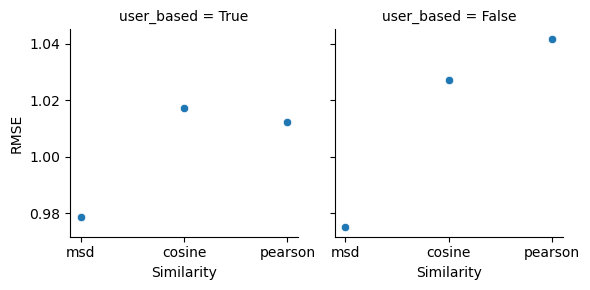

In [230]:
plot = sns.FacetGrid(data=df, col='user_based', col_wrap=2)
plot.map(sns.scatterplot, 'name', 'rmse')
plot.set_axis_labels("Similarity", "RMSE")

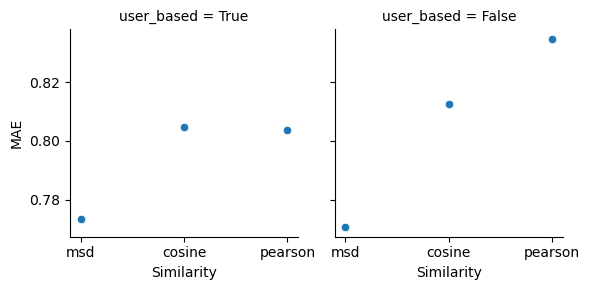

In [232]:
plot = sns.FacetGrid(data=df, col='user_based', col_wrap=2)
plot.map(sns.scatterplot, 'name', 'mae')
plot.set_axis_labels("Similarity", "MAE")

Examine how the number of neighbors impacts the performances of User based Collaborative Filtering and Item based Collaborative Filtering

In [233]:
parameters = {
    'k': np.arange(5,50,5),
    'sim_options': {
        'user_based': [True, False],
    },
}
grid = GridSearchCV(algo_class=KNNBasic, param_grid=parameters, measures=["rmse", "mae"], cv=5)
grid.fit(ratings)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [239]:
rmse_score = grid.cv_results['mean_test_rmse']
mae_score = grid.cv_results['mean_test_mae']
k = grid.cv_results['param_k']
user_based = [dict['user_based'] for dict in grid.cv_results['param_sim_options']]
df = pd.DataFrame(np.transpose([rmse_score, mae_score, k, user_based]), columns=['rmse', 'mae', 'k', 'user_based'])
df = df.astype({'rmse': float, 'mae':float, 'k':int, 'user_based': bool})
df

,rmse,mae,k,user_based
0,1.022172,0.803048,5,True
1,1.071990,0.841768,5,False
2,0.987942,0.778493,10,True
3,1.012493,0.798502,10,False
4,0.978419,0.771392,15,True
5,0.991857,0.782481,15,False
6,0.976093,0.769612,20,True
7,0.982518,0.775717,20,False
8,0.975965,0.769947,25,True
9,0.977806,0.772031,25,False


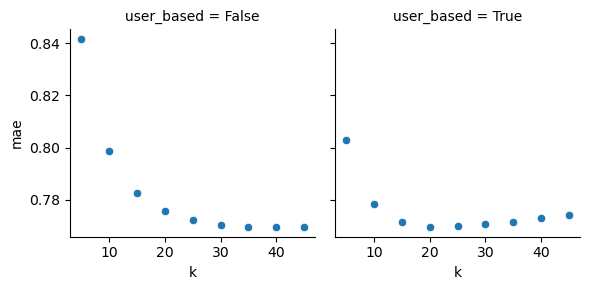

In [240]:
plot = sns.FacetGrid(data=df, col='user_based', col_wrap=2)
plot.map(sns.scatterplot, 'k', 'mae')

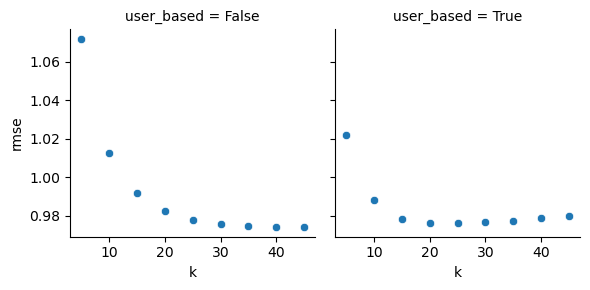

In [241]:
plot = sns.FacetGrid(data=df, col='user_based', col_wrap=2)
plot.map(sns.scatterplot, 'k', 'rmse')

Identify the best number of neighbor (denoted by K) for User/Item based collaborative filtering in terms of RMSE. 

In [237]:
df.loc[df.user_based == 1].sort_values(by='rmse')

,rmse,mae,k,user_based
8,0.975965,0.769947,25,1.0
6,0.976093,0.769612,20,1.0
10,0.976657,0.770747,30,1.0
12,0.977315,0.771592,35,1.0
4,0.978419,0.771392,15,1.0
14,0.978569,0.772990,40,1.0
16,0.979963,0.774283,45,1.0
2,0.987942,0.778493,10,1.0
0,1.022172,0.803048,5,1.0


In [238]:
df.loc[df.user_based == 0].sort_values(by='rmse')

,rmse,mae,k,user_based
15,0.973895,0.769390,40,0.0
17,0.973985,0.769689,45,0.0
13,0.974448,0.769572,35,0.0
11,0.975663,0.770258,30,0.0
9,0.977806,0.772031,25,0.0
7,0.982518,0.775717,20,0.0
5,0.991857,0.782481,15,0.0
3,1.012493,0.798502,10,0.0
1,1.071990,0.841768,5,0.0
